<a href="https://colab.research.google.com/github/Eltensy/data-science-school-2025/blob/main/Data_Science_School_Titanic_Dataset_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
df = pd.read_csv("/content/Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df = df.dropna(subset=['Age'])
df = df.dropna(subset=['Embarked'])
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,448.589888,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,258.683191,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,677.250000,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [ ]:
# Дуже багато пропущених значень (>70%) Cabin; Name, Ticket, PassengerId не впливає на результат виживання
df.drop(columns=["Cabin", "Name", "Ticket", "PassengerId"], inplace=True)

In [ ]:
# Енкодер змінних Sex, Embarked
df["Sex"] = LabelEncoder().fit_transform(df["Sex"])
df["Embarked"] = LabelEncoder().fit_transform(df["Embarked"])
display(df)

# Пре-процессінг закінчено

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
885,0,3,0,39.0,0,5,29.1250,1
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
889,1,1,1,26.0,0,0,30.0000,0


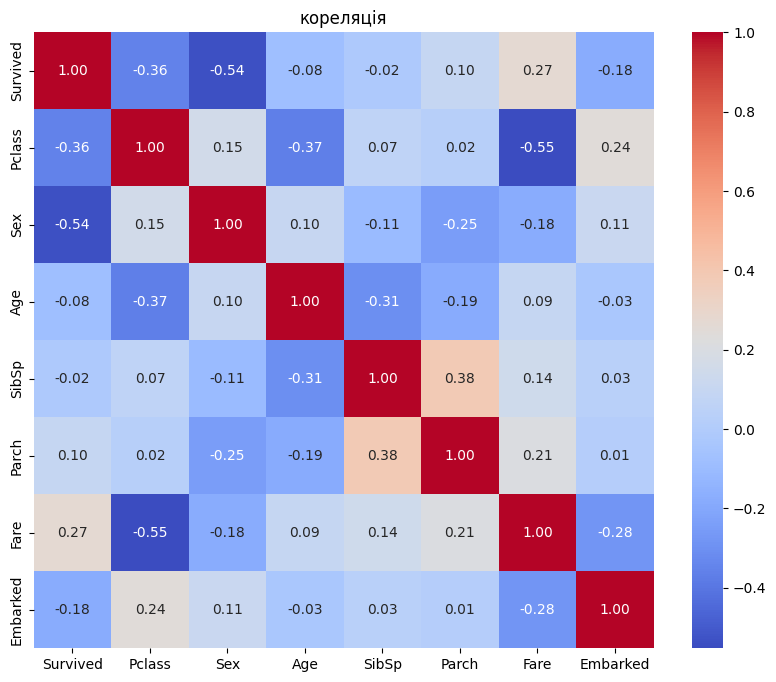

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("кореляція")
plt.show()
# кореляцій немає, тому можна іти тренувати модель

In [ ]:
# розділення дата фрейму на трейн 80% i вал 20% з використанням stratify, щоб зберегти відношення
X = df.drop("Survived", axis=1)
y = df["Survived"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print(f"train: {len(X_train)} ({len(X_train)/len(df)})")
print(f"val: {len(X_val)} ({len(X_val)/len(df)})")

train: 569 (0.7991573033707865)
val: 143 (0.20084269662921347)


In [ ]:
# Модель Random Forect Classifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)
y_val_pred = rf_model.predict(X_val)

# результати
print("accuracy:", accuracy_score(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

accuracy: 0.7972027972027972
              precision    recall  f1-score   support

           0       0.80      0.88      0.84        85
           1       0.80      0.67      0.73        58

    accuracy                           0.80       143
   macro avg       0.80      0.78      0.78       143
weighted avg       0.80      0.80      0.79       143



In [ ]:
# Модель Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)

y_val_pred_log = log_model.predict(X_val_scaled)

# результати
print("accuracy:", accuracy_score(y_val, y_val_pred_log))
print(classification_report(y_val, y_val_pred_log))

accuracy: 0.7902097902097902
              precision    recall  f1-score   support

           0       0.82      0.84      0.83        85
           1       0.75      0.72      0.74        58

    accuracy                           0.79       143
   macro avg       0.78      0.78      0.78       143
weighted avg       0.79      0.79      0.79       143



In [ ]:
# Модель Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

y_val_pred_gb = gb_model.predict(X_val)

# результати
print("accuracy:", accuracy_score(y_val, y_val_pred_gb))
print(classification_report(y_val, y_val_pred_gb))

accuracy: 0.8041958041958042
              precision    recall  f1-score   support

           0       0.83      0.85      0.84        85
           1       0.77      0.74      0.75        58

    accuracy                           0.80       143
   macro avg       0.80      0.79      0.80       143
weighted avg       0.80      0.80      0.80       143



In [ ]:
# формую метрику з моделей та записую в зручному форматі для подальшої візуалізації
report_log = classification_report(y_val, y_val_pred_log, output_dict=True)
report_gb  = classification_report(y_val, y_val_pred_gb, output_dict=True)
report_rf  = classification_report(y_val, y_val_pred, output_dict=True)

log_metrics = [
    accuracy_score(y_val, y_val_pred_log),
    report_log["1"]["precision"],
    report_log["1"]["recall"],
    report_log["1"]["f1-score"]
]

gb_metrics = [
    accuracy_score(y_val, y_val_pred_gb),
    report_gb["1"]["precision"],
    report_gb["1"]["recall"],
    report_gb["1"]["f1-score"]
]

rf_metrics = [
    accuracy_score(y_val, y_val_pred),
    report_rf["1"]["precision"],
    report_rf["1"]["recall"],
    report_rf["1"]["f1-score"]
]

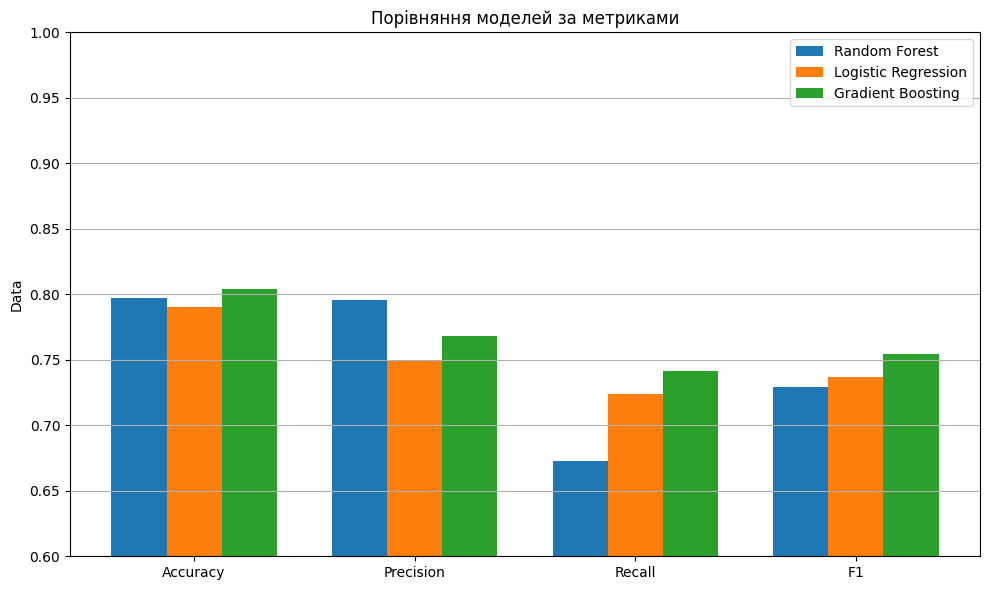

In [ ]:
# візуалізація
models = ["Random Forest", "Logistic Regression", "Gradient Boosting"]
metric_names = ["Accuracy", "Precision", "Recall", "F1"]
all_metrics = [rf_metrics, log_metrics, gb_metrics]

x = np.arange(len(metric_names))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))

for i, metrics in enumerate(all_metrics):
    ax.bar(x + i * width, metrics, width, label=models[i]) # ітерація по кожному стовпцю

ax.set_ylabel('Data')
ax.set_title('Порівняння моделей за метриками')
ax.set_xticks(x + width)
ax.set_xticklabels(metric_names)
ax.set_ylim(0.6, 1.0) # зум для кращого контрасту метрик
ax.legend()

plt.grid(axis='y')
plt.tight_layout()
plt.show()

Дані виявились хорошими, після невеликого пре-процесінгу отримав дуже хороший для тестування дата фрейм. Такий висновок я зробив на основі візуального перегляду і кореляційної хітмапи.
Далі дані я поділив по групам 80/20 для тренувальної і валідаційної функції відповідно. Для регресивної моделі зробив масштабування деяких колонок для корректного тренування. В результаті отримав 3 моделі: Random Forest, Logistic Regression i Gradient Boosting. По метрикам (acc, precision, recall i f1) важко сказати очевидний висновок. Random Forest показує себе помітно найгірше на recall, зі всіма іншими метриками все менш очевидно. На мою думку все таки Gradient Boosting показав себе найкраще на цих даних.

Цікаво що спочатку я брав 70/15/15 і на тих даних Random Forest показував себе помітно краще інших, але потім при зміні на 80/20 все стало практично навпаки, хоча різниця в даних буквально до 100 записів. Скоріш за все через малу кількість даних важко оцінити реальний перфоманс потрібної моделі.